#2장_실습 환경 설정과 파이토치 기초

##**2.1 파이토치 개요**

##**2.2 파이토치 기본 문법**

###**2.2.1 텐서 다루기**

In [ ]:
##텐서 생성 및 변환
import torch
print(torch.tensor([[1,2],[3,4]])) #2차원 텐서 생성
print(torch.tensor([[1,2],[3,4]], dtype=torch.float64)) #dtype를 이용해 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [ ]:
temp = torch.tensor([[1,2],[3,4]])
print(temp.numpy())

[[1 2]
 [3 4]]


In [ ]:
##텐서의 인덱스 조작
temp = torch.FloatTensor([1,2,3,4,5,6,7])
print(temp[0],temp[1],temp[-1]) #인덱스로 접근
print('------------')
print(temp[2:5], temp[4:-1]) #슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
------------
tensor([3., 4., 5.]) tensor([5., 6.])


In [ ]:
##텐서 연산 및 차원 조작_텐서 간의 타입이 같을 때만 수학 연산 가능
v = torch.tensor([1,2,3])
w = torch.tensor([3,4,6])
print(w-v)

tensor([2, 2, 3])


In [ ]:
##텐서의 차원 변경_view / stack / cat/ t / transpose
temp = torch.tensor([[1,2], [3,4]])

print(temp.shape)
print('---------------')
print(temp.view(4,1)) # 2*2 행렬을 4*1 행렬로 변형
print('---------------')
print(temp.view(-1)) # 2*2 행렬을 1차원 벡터로 변형
print('---------------')
print(temp.view(1,-1)) #(1,-1)은 (1, ?)과도 같은 의미. 이 예시에서는 데이터가 2*2 형태에서 (1,?)를 만족해야하므로 ?는 4가 됨.
print('---------------')
print(temp.view(-1,1))

torch.Size([2, 2])
---------------
tensor([[1],
        [2],
        [3],
        [4]])
---------------
tensor([1, 2, 3, 4])
---------------
tensor([[1, 2, 3, 4]])
---------------
tensor([[1],
        [2],
        [3],
        [4]])


### **2.2.2 데이터 준비**



*   파이썬 라이브러리 이용
*   파이토치 제공 데이터 이용



In [ ]:
##파일 불러와서 사용
import pandas as pd
import torch
data = pd.read_csv('../class2.csv') #특정 파일 지정하지 않음

In [ ]:
##커스텀 데이터셋을 만들어서 사용_데이터를 한번에 다 부르지 않고 조금씩 나누어서 사용하는 방식
class CustomerDataset(torch.utils.data.Dataset):
  def__init__(self): # 필요한 변수 선언, 전처리
  def__len__(self): # 데이터셋의 길이를 가져옴
  def__getitem__(self, index): # 데이터셋에서 특정 데이터를 가져옴

In [ ]:
#커스텀 데이터셋 구현 예제

import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data import dataloader

class CustomDataset(Dataset): #csv_file 파라미터를 통해 데이터셋을 불러옴
  def __init__(self, csv_file):
    self.label = pd.read_csv(csv_file)

  def __len__(self): # 전체 데이터셋의 크기를 보여줌
    return len(self.label)

  def __getitem__(self, idx):
    sample = torch.tensor(self.label.iloc[idx,0:3]).int()
    label = torch.tensor(self.label.iloc[idx,3]).int()
    return sample, label

tensor_dataset = CustomDataset('../covtype/csv')
dataset = DataLoader(tensor_dataset, batch_size = 4, shuffle = True)

###**2.2.5 모델 훈련**

In [ ]:
for epoch in range(100):
  yhat = model(x_train)
  loss = criterion(yhat, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

###**2.2.6 모델 평가**

In [ ]:
import torch
import torchmetrics

preds = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5,(10,))

acc = torchmetrics.Accuracy()

##**2.4 파이토치 코드 맛보기**

In [22]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_evaluation.csv')

In [21]:
dataset.head()

price  maint doors persons lug_capacity safety output
0  vhigh  vhigh     2       2        small    low  unacc
1  vhigh  vhigh     2       2        small    med  unacc
2  vhigh  vhigh     2       2        small   high  unacc
3  vhigh  vhigh     2       2          med    low  unacc
4  vhigh  vhigh     2       2          med    med  unacc

<Axes: ylabel='count'>

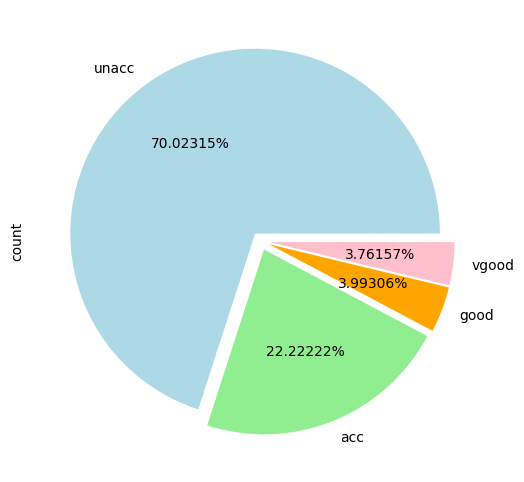

In [28]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind = 'pie', autopct = '%0.05f%%', colors = ['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))


In [31]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
  dataset[category] = dataset[category].astype('category')

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = price = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values
categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

#cat.codes -> 범주형 데이터를 숫자(넘파이 배열)로 변환
#np.stack은 두 개 이상의 넘파이 객체를 합칠 때 사용

array([[0, 3, 0, 0, 2, 1],
       [0, 3, 0, 0, 2, 2],
       [0, 3, 0, 0, 2, 0],
       [0, 3, 0, 0, 1, 1],
       [0, 3, 0, 0, 1, 2],
       [0, 3, 0, 0, 1, 0],
       [0, 3, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 2],
       [0, 3, 0, 0, 0, 0],
       [1, 3, 0, 1, 2, 1]], dtype=int8)

In [33]:
#배열을 텐서로 변환
catefgorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

array([[0, 3, 0, 0, 2, 1],
       [0, 3, 0, 0, 2, 2],
       [0, 3, 0, 0, 2, 0],
       [0, 3, 0, 0, 1, 1],
       [0, 3, 0, 0, 1, 2],
       [0, 3, 0, 0, 1, 0],
       [0, 3, 0, 0, 0, 1],
       [0, 3, 0, 0, 0, 2],
       [0, 3, 0, 0, 0, 0],
       [1, 3, 0, 1, 2, 1]], dtype=int8)

In [43]:
#레이블 칼럼도 텐서로 변환
outputs = pd.get_dummies(dataset.output) #pd.get_dummies -> 가변수 지정, 번주형 변수를 0,1 로 변환함.
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

(1728, 6)
torch.Size([6912])


In [45]:
#범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [46]:
#데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [47]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [48]:
#모델 네트워크 생성
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [49]:
#Model 클래스 객체 생성
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [50]:
#모델 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [51]:
#CPU 쓸지 GPU 쓸지 결정
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

***아래의 코드 오류 원인을 찾지 못해 이후의 코드를 실행하지 못했습니다. 출력 결과는 교재로 학습했으며 추후에 원인을 찾아 수정하겠습니다!**

In [54]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

TypeError: embedding(): argument 'indices' (position 2) must be Tensor, not numpy.ndarray

In [ ]:
#테스트셋으로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data).to(device)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

In [ ]:
print(y_val[:5])

In [ ]:
#가장 큰 값을 갖는 인덱스 확인
y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_outputs=test_outputs.cpu().numpy()
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))